In [1]:
%run 2-source.ipynb

Exception: File `'2-source.ipynb;'` not found.

# Exports for metric learning

easy    1587
hard    1099
Name: spoken_difficulty, dtype: int64
bin 0
bin 1
bin 2
bin 3
bin 4
bin 5


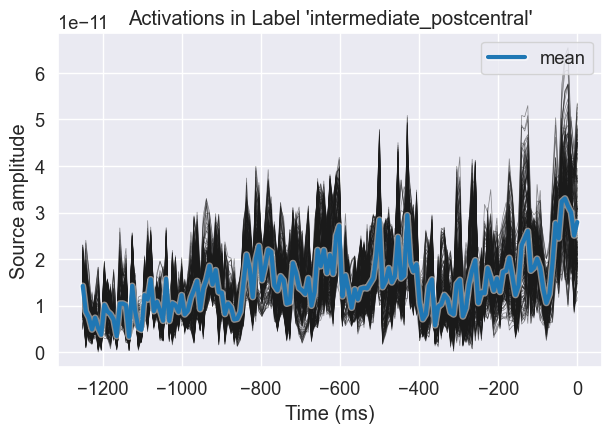

In [ ]:
# participant, voice-reported measure of trial difficulty
sel_epochs = motor_epochs["spoken_difficulty != 'unknown'"]
X = sel_epochs.get_data()
y = sel_epochs.metadata['spoken_difficulty']
print(y.value_counts())
np.save(f"{output_dir}X_sensor_spoken_difficulty",X)
np.save(f"{output_dir}y_spoken_difficulty", y)

all_tcs = get_all_tcs(f"{output_dir}metric_learning_exports/", sel_epochs, file_name = 'spoken_difficulty', overwrite=False)
assert len(all_tcs) == len(sel_epochs), 'the source data is not the same size as the motor_epochs, check this issue'
np.save(f"{output_dir}X_atlas_spoken_difficulty",all_tcs)

high    2467
low     2404
Name: pupil_bin, dtype: int64
bin 0
bin 1
bin 2
bin 3
bin 4
bin 5
bin 6
bin 7
bin 8
bin 9
bin 10


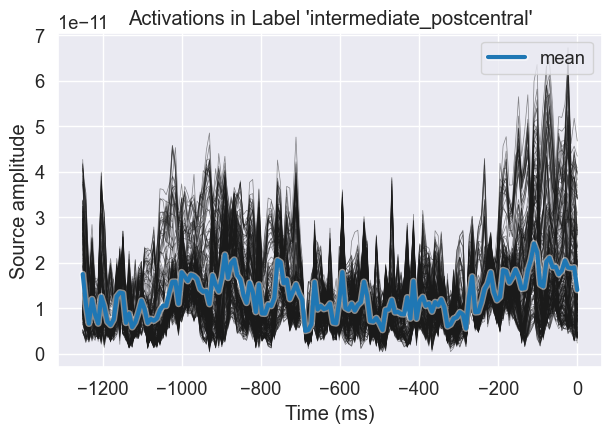

In [ ]:
# participant-level binning of pupil diameter to pred. pupil-linked arousal
sel_epochs = motor_epochs
X = sel_epochs.get_data()
y = sel_epochs.metadata['pupil_bin']
print(y.value_counts())
np.save(f"{output_dir}X_sensor_pupil_bin",X)
np.save(f"{output_dir}y_pupil_bin",y)

all_tcs = get_all_tcs(f"{output_dir}metric_learning_exports/", sel_epochs, file_name = 'pupil_bin', overwrite=False)
assert len(all_tcs) == len(sel_epochs), 'the source data is not the same size as the motor_epochs, check this issue'
np.save(f"{output_dir}X_atlas_pupil_bin",all_tcs)

Low     2697
High    2429
Name: Steer_Wheel_Degree_Categorical, dtype: int64
bin 0
bin 1
bin 2
bin 3
bin 4
bin 5
bin 6
bin 7
bin 8
bin 9
bin 10


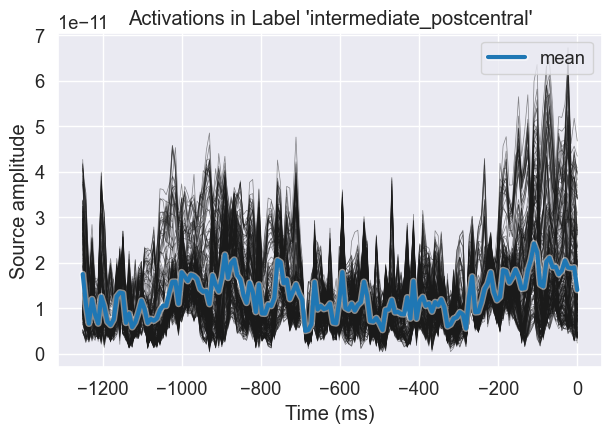

In [ ]:
# participant-level binning of steering wheel turns to predict behavioral outcome
sel_epochs = motor_epochs
X = sel_epochs.get_data()
y = sel_epochs.metadata['Steer_Wheel_Degree_Categorical']
print(y.value_counts())
np.save(f"{output_dir}X_sensor_steer_degree",X)
np.save(f"{output_dir}y_steer_degree_bin",y)
np.save(f"{output_dir}y_steer_degree",sel_epochs.metadata['Abs_Steer_Wheel_Degree'])

all_tcs = get_all_tcs(f"{output_dir}metric_learning_exports/", sel_epochs, file_name = 'steer_degree', overwrite=False)
assert len(all_tcs) == len(sel_epochs), 'the source data is not the same size as the motor_epochs, check this issue'
np.save(f"{output_dir}metric_learning_exports/X_atlas_steer_degree",all_tcs)

In [ ]:
ordered_mappings = []
for r in rel_labels:
    ordered_mappings.append((rel_mappings[r.name], r.hemi, r.name))
ordered_mappings = pd.DataFrame(ordered_mappings,columns=['mapping', 'hemi','mne_name'])
ordered_mappings.to_csv(f"{output_dir}metric_learning_exports/ordered_mappings.csv")
eeg_channel_names = mne.channels.make_standard_montage(eeg_montage).ch_names
pd.DataFrame(eeg_channel_names,columns=['channel_name']).to_csv(f"{output_dir}metric_learning_exports/eeg_channels.csv")

In [ ]:
np.save(f"{output_dir}metric_learning_exports/eeg_feats_pupil_bin",motor_dfs.iloc[:,74:-5].to_numpy())